In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import gdown
gdown.download('https://drive.google.com/uc?id=1QdhIxh1QUEuLgRb7DWa7RA7CA08ybNRJ', output='train.zip', quiet=False)
! unzip train.zip -d .
! rm train.zip

In [ ]:
# Устанавливаем модуль import_ipynb и импортируем его.
# Он необходим для импорта файлов .ipynb.
try:
    import import_ipynb
except ModuleNotFoundError:
    ! pip install import-ipynb
    import import_ipynb

# Клонируем проект. Далее из проекта нам понадобиться файл 
# импорта модели - import_model.ipynb, расположенный в корне проекта.
try:
    from skillbox_thesis_project.import_model import Model
except ModuleNotFoundError:
    ! git clone https://github.com/GrinkoL/skillbox_thesis_project.git
    from skillbox_thesis_project.import_model import Model

# Имплементируем модель
model = Model()

  Created wheel for import-ipynb: filename=import_ipynb-0.1.3-cp37-none-any.whl size=2976 sha256=7c7ee35fa530afa78c39c6fd9c69e5cc9597facaa3ffc78d7e322abc5c5b98c1
  Stored in directory: /root/.cache/pip/wheels/b4/7b/e9/a3a6e496115dffdb4e3085d0ae39ffe8a814eacc44bbf494b5
Successfully built import-ipynb
Cloning into 'skillbox_thesis_project'...
remote: Enumerating objects: 102, done.
remote: Counting objects: 100% (102/102), done.
remote: Compressing objects: 100% (102/102), done.
remote: Total 261 (delta 52), reused 0 (delta 0), pack-reused 159
Receiving objects: 100% (261/261), 792.81 KiB | 21.43 MiB/s, done.
Resolving deltas: 100% (104/104), done.
importing Jupyter notebook from /content/skillbox_thesis_project/import_model.ipynb


Downloading...
From: https://drive.google.com/uc?id=1-HDQxtpZKGuKWQhsiDANyc41SL_CwHdU
To: /content/model.zip
1.34GB [00:07, 170MB/s]


Archive:  model.zip
   creating: ./model/
   creating: ./model/variables/
  inflating: ./model/variables/variables.data-00000-of-00001  
  inflating: ./model/variables/variables.index  
   creating: ./model/assets/
  inflating: ./model/saved_model.pb  


In [ ]:
gen = ImageDataGenerator()
iter = gen.flow_from_directory(directory='train', batch_size=15, class_mode='sparse')

(images, class_id) = next(iter)
class_indices = iter.class_indices
class_indices = {v:k for k,v in class_indices.items()}

Found 50046 images belonging to 9 classes.


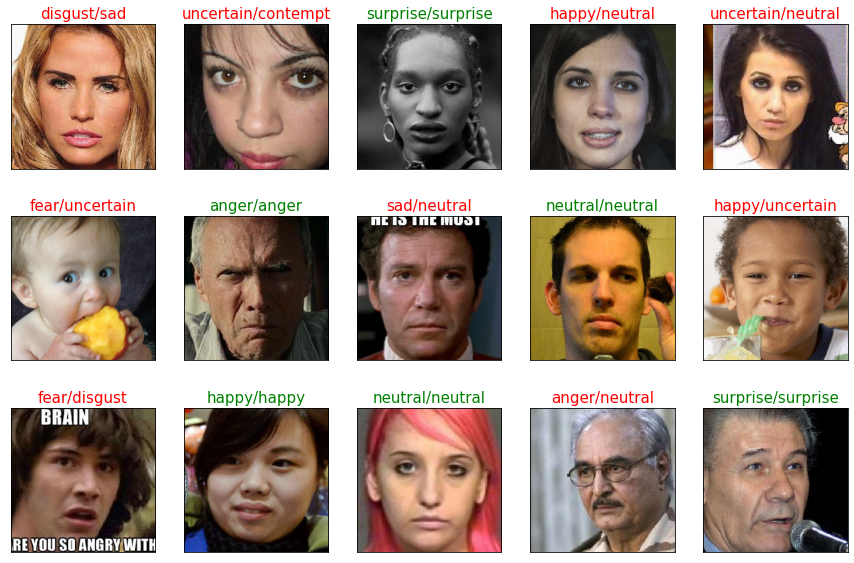

In [ ]:
fig, axs = plt.subplots(3,5)
fig.set_size_inches(15,10)
for i,ax in enumerate(axs.flatten()):
    ax.imshow(images[i]/255.0)
    ax.set_xticks([])
    ax.set_yticks([])
    real = class_indices[class_id[i]]
    pred = model.predict(images[i])
    color = 'green' if real == pred else 'red'
    ax.set_title(f'{real}/{pred}', color=color, size=15)